In [1]:
import os
import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
variable_path_base = r'../data/variables'
variable_files_pattern = f'var-mes-*.zip'

In [3]:
variable_path_base = variable_path_base.split('/')
variable_files = glob.glob(os.path.join(*variable_path_base, variable_files_pattern))
print(len(variable_files), variable_files)

7 ['..\\data\\variables\\var-mes-PTPM_CON.zip', '..\\data\\variables\\var-mes-PT_10_TT_D.zip', '..\\data\\variables\\var-mes-Q_MEDIA_D.zip', '..\\data\\variables\\var-mes-Q_MN_D.zip', '..\\data\\variables\\var-mes-Q_MX_D.zip', '..\\data\\variables\\var-mes-TMN_CON.zip', '..\\data\\variables\\var-mes-TMX_CON.zip']


In [4]:
dtypes = { 'CodigoEstacion':'category','Etiqueta':'category'}
dateparse = lambda x: datetime.strptime(x, '%Y-%m')

In [9]:
def exploreVariable(f):
    print(f'Archivo: {f}')
    print(f'Leyendo...')
    df = pd.read_csv(f, dtype = dtypes, parse_dates = ['Fecha'], date_parser = dateparse)#, index_col = ['Fecha', 'CodigoEstacion'])
    
    etiqueta = df.iat[0,1]
    cols_explore = df.loc[0:1,'min':'max'].columns
    
    print(f'Etiqueta leída: {etiqueta}')
    print(df.shape)
    
    print(f'Generando boxplot...')
    
    fig = plt.figure(figsize = (15,10))
    fig.suptitle(f'{etiqueta}', fontsize=16)

    for i, c in enumerate(cols_explore):
        ax = fig.add_subplot(220 + i + 1)
        #sns.scatterplot(x = 'Fecha', y = c, data = df, ax=ax)
        g = sns.boxplot(df[c], ax=ax)

    print(f'Grabando...')
    p = os.path.join(*variable_path_base, 'images', f'var-men-{etiqueta}_bp.png')
    plt.savefig(p)

Archivo: ..\data\variables\var-mes-PTPM_CON.zip
Leyendo...
Etiqueta leída: PTPM_CON
(455246, 7)
Generando boxplot...
Grabando...
Archivo: ..\data\variables\var-mes-PT_10_TT_D.zip
Leyendo...
Etiqueta leída: PT_10_TT_D
(4253, 7)
Generando boxplot...
Grabando...
Archivo: ..\data\variables\var-mes-Q_MEDIA_D.zip
Leyendo...
Etiqueta leída: Q_MEDIA_D
(170956, 7)
Generando boxplot...
Grabando...
Archivo: ..\data\variables\var-mes-Q_MN_D.zip
Leyendo...
Etiqueta leída: Q_MN_D
(85161, 7)
Generando boxplot...
Grabando...
Archivo: ..\data\variables\var-mes-Q_MX_D.zip
Leyendo...
Etiqueta leída: Q_MX_D
(85137, 7)
Generando boxplot...
Grabando...
Archivo: ..\data\variables\var-mes-TMN_CON.zip
Leyendo...
Etiqueta leída: TMN_CON
(95175, 7)
Generando boxplot...
Grabando...
Archivo: ..\data\variables\var-mes-TMX_CON.zip
Leyendo...
Etiqueta leída: TMX_CON
(89710, 7)
Generando boxplot...
Grabando...


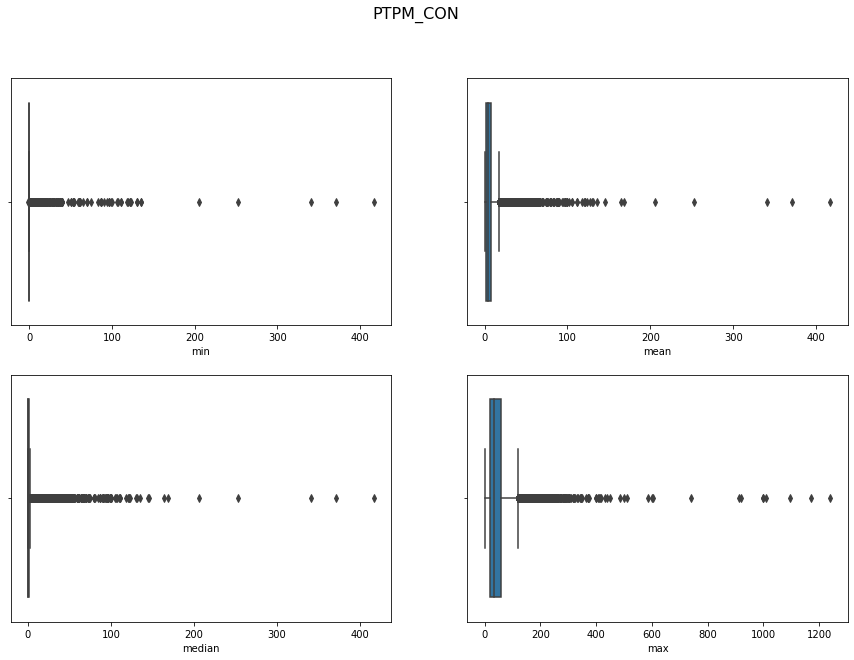

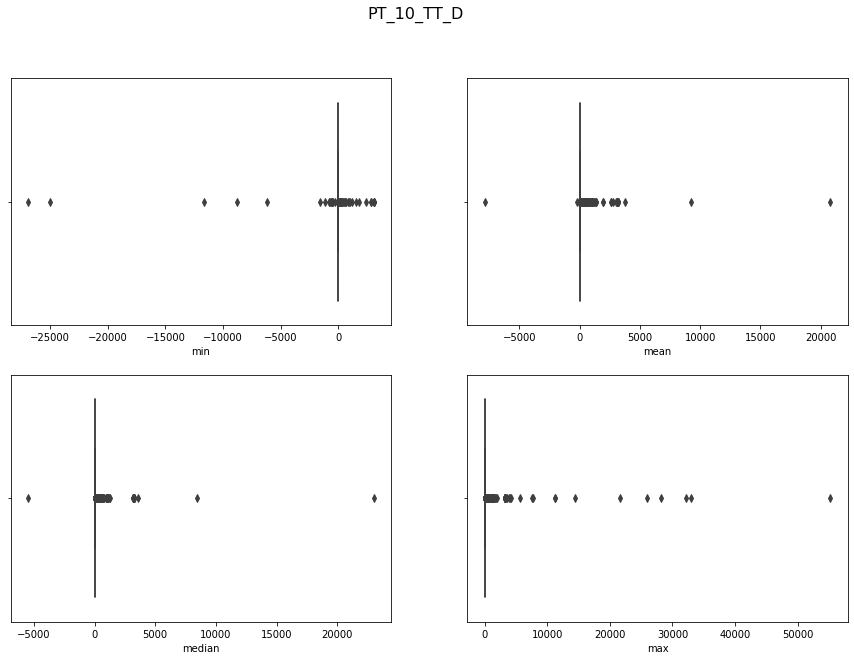

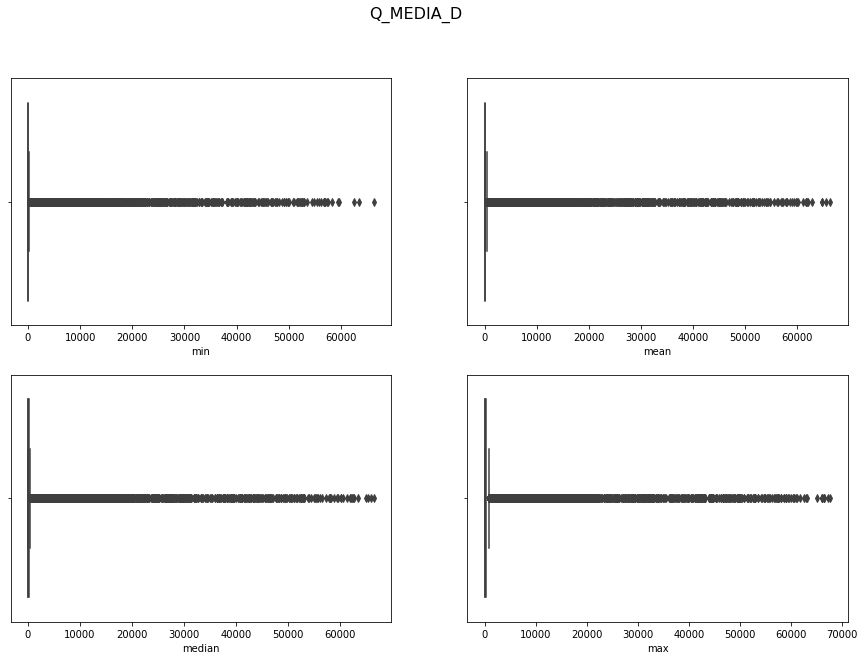

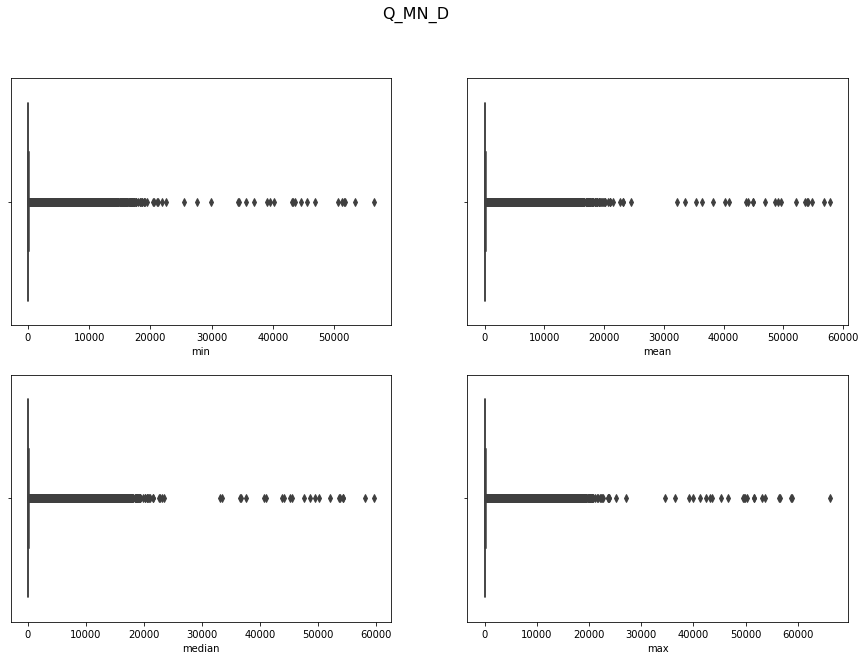

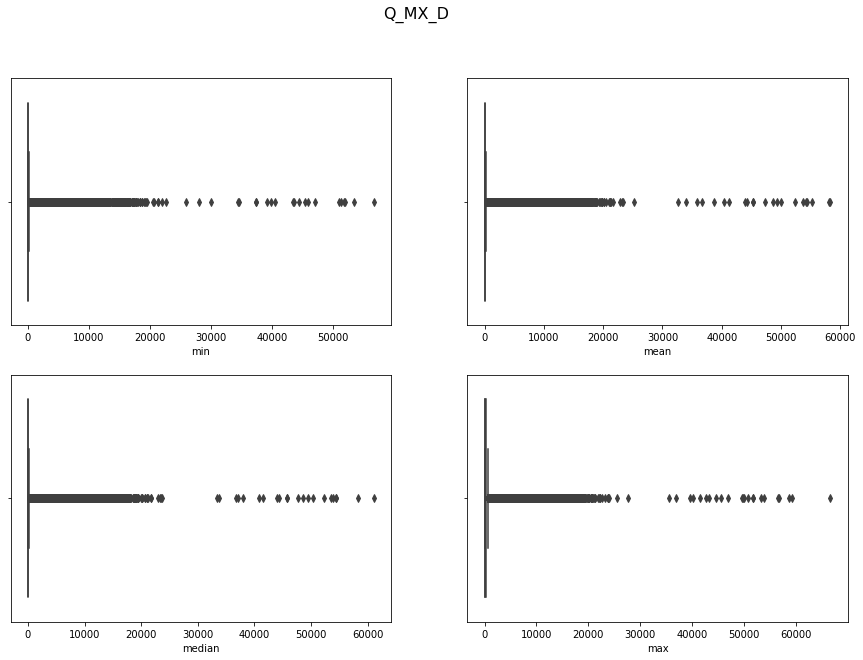

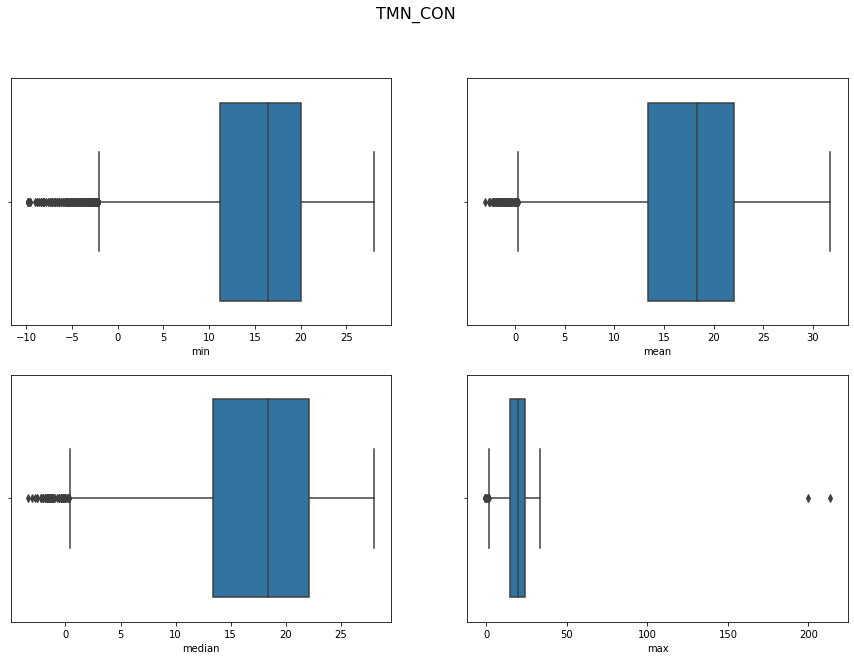

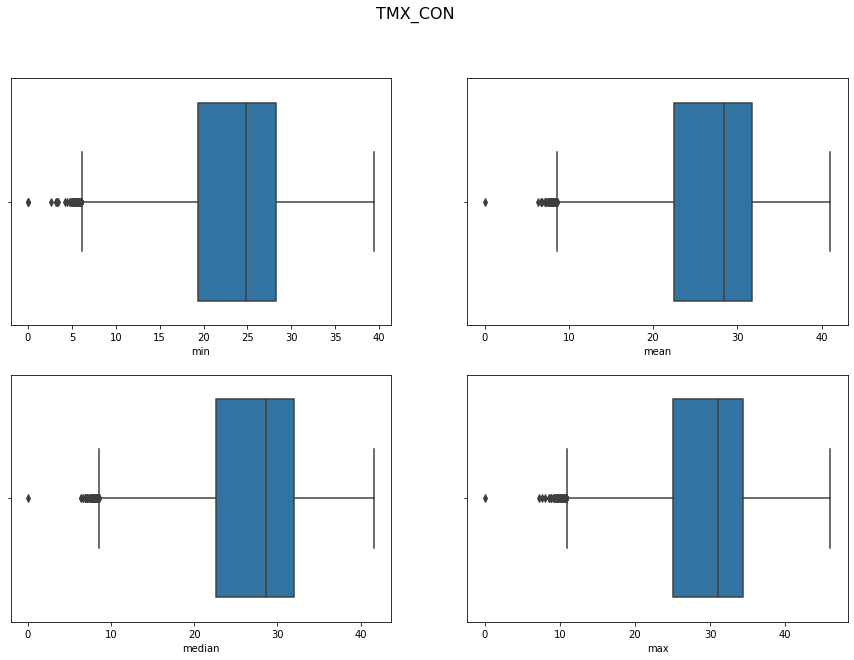

In [10]:
for f in variable_files:
    exploreVariable(f)